In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# def bisezione(a, b, f, tolx, xTrue):

#     if f(a)*f(b) >0:
#         print('Non esiste radice in [a,b]')
#         return()
    
#     k= 100
#     vecErr= np.zeros(k)
#     i=0
#     while(b-a) > tolx + 1.e-16 * max(a,b):
#         # if (b-a < tolx+1.e-16*max(a,b)):
#         #     print('Errore: l\'intervallo è troppo piccolo ')
#         #     return ('Errore', i, k, vecErr)
#         i= i+1
#         c= a + (b - a) /2
#         vecErr[i-1] = abs(c - xTrue)
#         if abs(f(c)) < 1.e-15:
#             x= c
#             return(x, i, k, vecErr)
#         else:
#             if f(a) * f(c) < 0:
#                 b= c
#             else:
#                 a= c
#     x= c
#     return(x, i, k, vecErr)



In [5]:
def bisezione(a, b, f, tolx, xTrue):
  k = 100       # numero minimo di iterazioni per avere un errore minore di tolx
  vecErrore = np.zeros( (k,1) )
  
  if f(a)*f(b)>0:
    print('non esiste radice in [a,b]')
    return()
    
      
  for i in range(1,k):

    c = a+(b-a)/2 #più stabile
    vecErrore[i] = abs(c - xTrue)

    if abs(f(c)) < 1.e-16:       # se f(c) è molto vicino a 0 
        print('converge')
    else:
        if f(c) > 0:
            b = c
        else:
            a = c
  x = c  
      
  return (x, i, k, vecErrore)

In [6]:
''' Metodo di Newton'''

def newton( f, df, tolf, tolx, maxit, xTrue, x0=0):
  
  err=np.zeros(maxit, dtype=float)
  vecErrore=np.zeros( (maxit,1), dtype=float)
  
  
  i=0
  err[0]=tolx+1
  vecErrore[0] = np.abs(x0-xTrue)
  x=x0

  while (i<maxit and  abs(f(x))>tolf ): # scarto assoluto tra iterati (err[i]>tolx or
    x_new= f(x)
    err[i]=abs(x_new-x)
    vecErrore[i]=abs(x-xTrue)
    i=i+1
    x=x_new
    
  err=err[0:i]      
  vecErrore = vecErrore[0:i]
  return (x, i, err, vecErrore)  

In [7]:
''' Metodo delle approssimazioni successive'''
def succ_app(f, g, tolf, tolx, maxit, xTrue, x0=0):
  
  err=np.zeros(maxit+1, dtype=np.float64)
  vecErrore=np.zeros(maxit+1, dtype=np.float64)
  
  
  i= 0
  err[0]= tolx + 1
  vecErrore[0] = np.abs(x0 - xTrue)
  x = x0

  while (i < maxit and (err[i] > tolx or abs(f(x)) > tolf) ): 
    x_new= g(x)
    err[i]= abs(x_new - x)
    vecErrore[i] = abs(x - xTrue)
    i+= 1
    x= x_new
    
  err = err[0 : i] 
  vecErrore = vecErrore[0 : i]
  return (x, i, err, vecErrore) 

In [8]:
'''creazione del problema 1'''
f1= lambda x: x**3+4*x*np.cos(x)-2
df1= lambda x: (2-x**3)/(4*np.cos(x))
x1true= 0.536839
f1true= f1(x1true)
print(f1true)

a1= 0.0
b1= 2.0
tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 1

1.436646284158627e-06


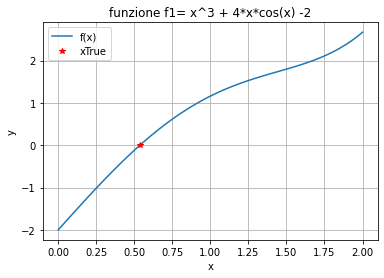

In [9]:
x_plot= np.linspace(a1,b1, 101)
f_plot= f1(x_plot)
plt.plot(x_plot, f_plot)
plt.plot(x1true, f1(x1true), '*', color='red')
plt.legend(("f(x)","xTrue"))
plt.xlabel("x")
plt.ylabel("y")
plt.title('funzione f1= x^3 + 4*x*cos(x) -2')
plt.grid()

In [10]:
''' Calcolo soluzione tramite Bisezione, Newton e Approssimazioni Successive'''
(xBise, iter_bise, err_bise, vecErr_bise)= bisezione(a1, b1, f1, 1.e-6, x1true) 
print('Metodo di bisezione \n x =', xBise,'\n iter_bise=',iter_bise  ,'\n iter_max=', maxit)
print('\n')

(xNew, iter_new, err_new, vecErr_new)= newton(f1, df1, tolf, tolx, maxit, f1true, x0)
print('Metodo di Newton \n x =', xNew,'\n iter_new=', iter_new, '\n err_new=', vecErr_new)
print('\n')




converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
Metodo di bisezione 
 x = 0.5368385515667755 
 iter_bise= 99 
 iter_max= 100


Metodo di Newton 
 x = inf 
 iter_new= 12 
 err_new= [[9.99998563e-001]
 [1.16120779e+000]
 [1.41549731e+000]
 [1.71190781e+000]
 [2.05389045e+000]
 [2.84796609e+000]
 [1.01953235e+001]
 [1.02848767e+003]
 [1.08791925e+009]
 [1.28762672e+027]
 [2.13486266e+081]
 [9.72993244e+243]]




C:\Users\sharo\AppData\Local\Temp\ipykernel_37916\2808962444.py:2: RuntimeWarning: overflow encountered in double_scalars
  f1= lambda x: x**3+4*x*np.cos(x)-2
C:\Users\sharo\AppData\Local\Temp\ipykernel_37916\2808962444.py:2: RuntimeWarning: invalid value encountered in cos
  f1= lambda x: x**3+4*x*np.cos(x)-2


In [11]:
(sol_n, iter_n, err_n, vecErr)= succ_app(f1, df1, tolf, tolx, maxit, x1true, x0)
print('Metodo approssimazioni successive \n x =',sol_n,'\n iter_new=', iter_n)


Metodo approssimazioni successive 
 x = 0.5368384268850389 
 iter_new= 6


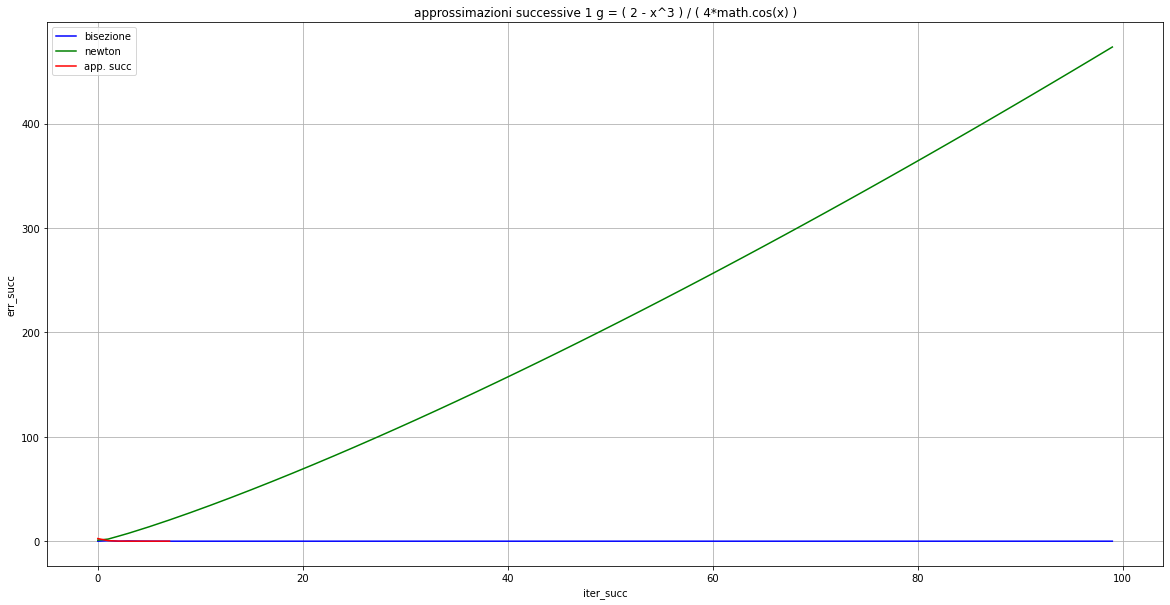

In [21]:
# Bisezione
iter_bis = np.arange(0, iter_bise+1)
plt.figure(figsize=(20,10))
plt.plot(iter_bis, vecErr_bise, 'b', label='bisezione')
plt.grid()
plt.xlabel('iter_bise')
plt.ylabel('err_bise')
plt.title('Bisezione1')

# Newton
iter_newton = np.arange(0, iter_new)
plt.plot(iter_newton, vecErr_new, 'g', label='newton')
plt.grid()
plt.xlabel('iter_newton')
plt.ylabel('err_newon')
plt.title('Newton1')

# approssimazioni successive
iter_succ = np.arange(0, iter_n)
plt.plot(iter_succ, vecErr, 'r', label='app. succ')
plt.grid()
plt.xlabel('iter_succ')
plt.ylabel('err_succ')
plt.legend()
plt.title('approssimazioni successive 1 g = ( 2 - x^3 ) / ( 4*math.cos(x) )')
plt.show()

In [13]:
'''creazione del problema 2'''
f2= lambda x: x-x**(1/3)-2
df2= lambda x: x**(1/3) +2
x2true= 3.5214
f2true= f2(x2true)
print(f2true)

a2= 3.0
b2= 5.0
tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 1

1.7370704914476676e-05


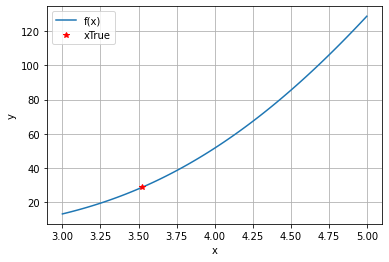

In [14]:
x_plot= np.linspace(a2,b2, 101)
f_plot= f1(x_plot)
plt.plot(x_plot, f_plot)
plt.plot(x2true, f1(x2true), '*', color='red')
plt.legend(("f(x)","xTrue"))
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

In [15]:
''' Calcolo soluzione tramite Bisezione, Newton e Approssimazioni Successive'''
(xBise, iter_bise, err, vecErr_bise)= bisezione(a2, b2, f2, tolf, x2true) 
print('Metodo di bisezione \n x =', xBise,'\n iter_bise=',iter_bise  ,'\n iter_max=', maxit)
print('\n')

(xNew, iter_new, err, vecErr_new)= newton(f2, df2, tolf, tolx, maxit, f2true, x0)
print('Metodo di Newton \n x =', xNew,'\n iter_new=', iter_new, '\n err_new=', vecErr_new)
print('\n')

converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
converge
Metodo di bisezione 
 x = 3.521379706804568 
 iter_bise= 99 
 iter_max= 100


Metodo di Newton 
 x = (-479.19479737328135-4.336139893729297j) 
 iter_new= 100 
 err_new= [[  0.99998263]
 [  2.00001737]
 [  4.7568105 ]
 [  7.58640785]
 [ 10.6763565 ]
 [ 13.77603697]
 [ 17.06504598]
 [ 20.35497199]
 [ 23.79962445]
 [ 27.24251157]
 [ 30.818781  ]
 [ 34.3922393 ]
 [ 38.08429595]
 [ 41.77309553]
 [ 45.56950885]
 [ 49.36247973]
 [ 53.25450674]
 [ 57.14303125]
 [ 61.12371291]
 [ 65.10089601]
 [ 69.16452834]
 [ 73.22469975]
 [ 77.36650089]
 [ 81.50489646]
 [ 85.72078517]

In [16]:
(sol_n, iter_n, err_n, vecErr)= succ_app(f2, df2, tolf, tolx, maxit, x2true, x0)
print('Metodo approssimazioni successive \n x =',sol_n,'\n iter_new=', iter_n)


Metodo approssimazioni successive 
 x = 3.5213789946128164 
 iter_new= 8


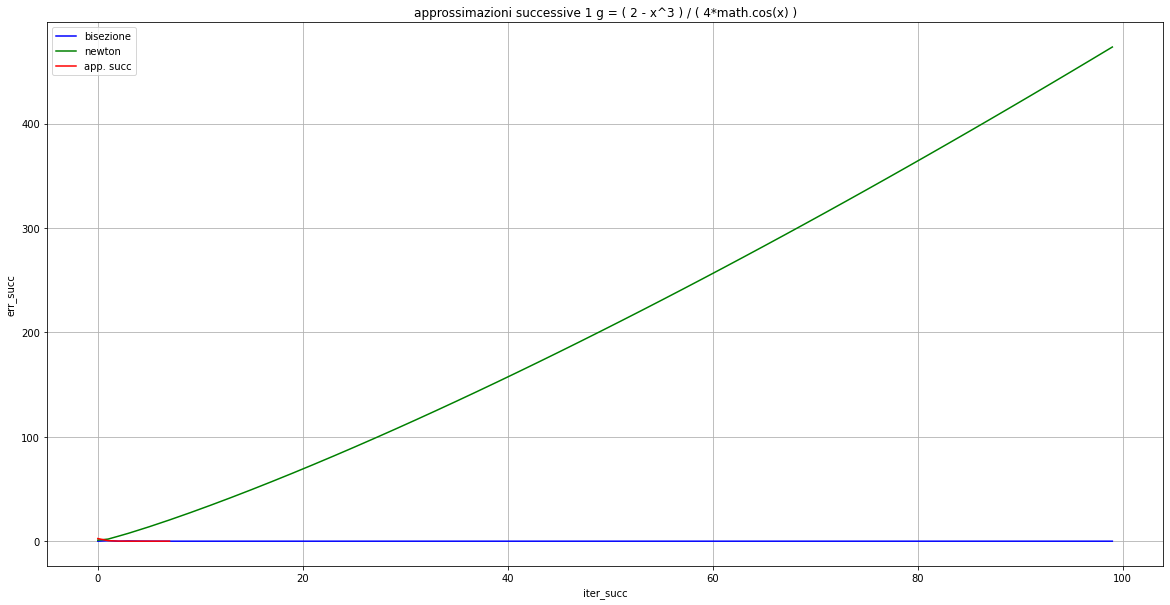

In [25]:
# Bisezione
iter_bis = np.arange(0, iter_bise+1)
plt.figure(figsize=(20,10))
plt.plot(iter_bis, vecErr_bise, 'b', label='bisezione')
plt.grid()
plt.xlabel('iter_bise')
plt.ylabel('err_bise')
plt.title('Bisezione1')

# Newton
iter_newton = np.arange(0, iter_new)
plt.plot(iter_newton, vecErr_new, 'g', label='newton')
plt.grid()
plt.xlabel('iter_newton')
plt.ylabel('err_newon')
plt.title('Newton1')

# approssimazioni successive
iter_succ = np.arange(0, iter_n)
plt.plot(iter_succ, vecErr, 'r', label='app. succ')
plt.grid()
plt.xlabel('iter_succ')
plt.ylabel('err_succ')
plt.legend()
plt.title('approssimazioni successive 1 g = ( 2 - x^3 ) / ( 4*math.cos(x) )')
plt.show()